# Coeficientre de correlacion Pearson:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
%pwd

'/content'

In [7]:
data_ads = pd.read_csv('./Advertising.csv')

In [8]:
data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
data_ads.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [10]:
data_ads.shape

(200, 4)

### Calcular por partes el coeficiente de correlacion Pearson entre tv y sales:

In [11]:
# creo un nuevo dataframe para el calculo manual del coeficiente de correlacion de pearson
df_corrn = data_ads

### Formula para la correlacion de Pearson

$$ r =\frac {\sum_{i=1}^n ((x_i - x_{mean})*(y_i-y_{mean}))}{\sqrt{\sum_{i=1}^n(x_i - x_{mean})^2  * \sum_{i=1}^n (y_i-y_{mean})^2})}$$

In [12]:
corrn_numerador = sum((df_corrn['TV']-df_corrn['TV'].mean())*(df_corrn['Sales']-df_corrn['Sales'].mean()))

In [13]:
corrn_numerador

69727.64874999998

In [43]:
corrn_denominador =  np.sqrt(sum((df_corrn['TV']-df_corrn['TV'].mean())**2)*sum((df_corrn['Sales']-df_corrn['Sales'].mean())**2))

In [44]:
corrn_denominador

89140.20904209996

In [45]:
r_pearson_tv_sales = corrn_numerador/corrn_denominador

In [46]:
r_pearson_tv_sales

0.782224424861606

Esto nos indica que la relacion entre TV y ventas tiene una correlacion positiva de 78.222 %  basante alta que se puede graficar

### Vamos hacer una funcion que para calcular esta correlacion:

In [48]:
def pearson_corrn(df_corrn, columnx, columny):
    corrn_numerador = sum((df_corrn[columnx]-df_corrn[columnx].mean())*(df_corrn[columny]-df_corrn[columny].mean()))
    corrn_denominador =  np.sqrt(sum((df_corrn[columnx]-df_corrn[columnx].mean())**2)*sum((df_corrn[columny]-df_corrn[columny].mean())**2))
    r_correlacion = corrn_numerador/corrn_denominador
    plt.scatter(df_corrn[columnx], df_corrn[columny])
    plt.title("Grafico "+columnx+" vs "+columny)
    plt.ylabel(columny)
    plt.xlabel(columnx)
    return r_correlacion

0.782224424861606

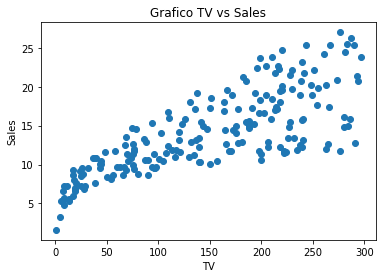

In [47]:
pearson_corrn(df_corrn, 'TV', 'Sales')

0.5762225745710553

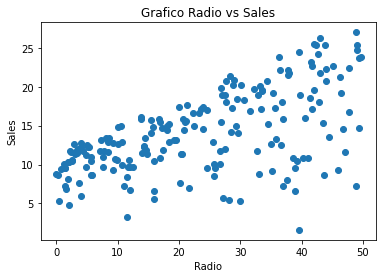

In [20]:
pearson_corrn(df_corrn, 'Radio', 'Sales')

0.22829902637616525

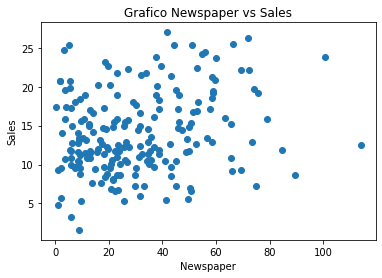

In [21]:
pearson_corrn(df_corrn, 'Newspaper', 'Sales')

## Usando pandas para calcular  el coeficiente de correlacion de Pearson

In [22]:
data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [23]:
np.random.random((4,4))

array([[0.1921148 , 0.26159231, 0.10968415, 0.73333747],
       [0.09886086, 0.80480609, 0.0263861 , 0.95420828],
       [0.12330638, 0.20373641, 0.72764012, 0.049396  ],
       [0.32865164, 0.69181424, 0.91949278, 0.29110742]])

In [24]:
data = data_ads.corr()
data.shape

np.array(data)

array([[1.        , 0.05480866, 0.05664787, 0.78222442],
       [0.05480866, 1.        , 0.35410375, 0.57622257],
       [0.05664787, 0.35410375, 1.        , 0.22829903],
       [0.78222442, 0.57622257, 0.22829903, 1.        ]])

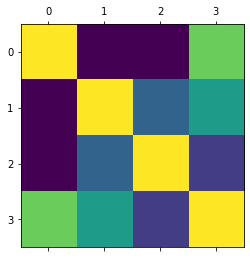

In [25]:
plt.matshow(data_ads.corr())

Nota: La siguiente grafica muestra el grado de relacion entre las variables, siendo amarillo el mayor grado de correlacion y morado oscuro el mas bajo.  La mejor correlacion es la cercana a 1 en este caso tv-sales con un verdecito claro. 




In [26]:
alpha = data_ads.columns.values

alpha

array(['TV', 'Radio', 'Newspaper', 'Sales'], dtype=object)

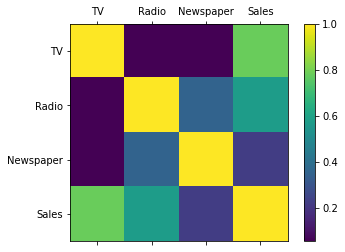

In [27]:
alpha =['TV', 'Radio', 'Newspaper', 'Sales']

data = np.array(data_ads.corr())

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(data, interpolation='nearest')
fig.colorbar(cax)

ax.set_xticklabels(['']+alpha)
ax.set_yticklabels(['']+alpha)

plt.show()

In [28]:
data_ads.size

800

In [29]:
data_ads.shape

(200, 4)

In [30]:
n = data_ads.shape[0]
sxy =  np.sum(data_ads['TV']*data_ads['Sales'])

In [31]:
x2 = data_ads['TV']**2

In [32]:
y2 = data_ads['Sales']**2

In [33]:
sx = np.sum(data_ads['TV'])

In [34]:
sy = np.sum(data_ads['Sales'])

In [35]:
sx2 = sx**2

In [36]:
sy2 = sy**2

In [37]:
n*sxy - sx*sy

13945529.75

In [38]:
sumx2 = np.sum(x2)
sumy2 = np.sum(y2)

In [39]:
sqrt1 = np.sqrt(n*sumx2-sx2 )

In [40]:
sqrt2 = np.sqrt(n*sumy2-sy2)

In [41]:
sqrttotal = sqrt1*sqrt2

In [42]:
13945529.75/ sqrttotal

0.7822244248616064